In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'pic50RDkit2D.csv')
df.shape
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [9]:
X = df.drop("pIC50", axis=1)
Y = df["pIC50"]
df.head(10)
df=df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
df=df.replace(np.nan, 0)
X = df.drop("pIC50", axis=1)
y = df["pIC50"]
X = np.nan_to_num(X)
y = np.nan_to_num(y)

#Spliting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)


Coefficient of determination(R^2) = 0.6481999242018462
Mean squared error = 0.46728249092441093
Root Mean squared error = 0.6835806396647077


Text(0.5, 1.0, 'Extremely Randomized Trees')

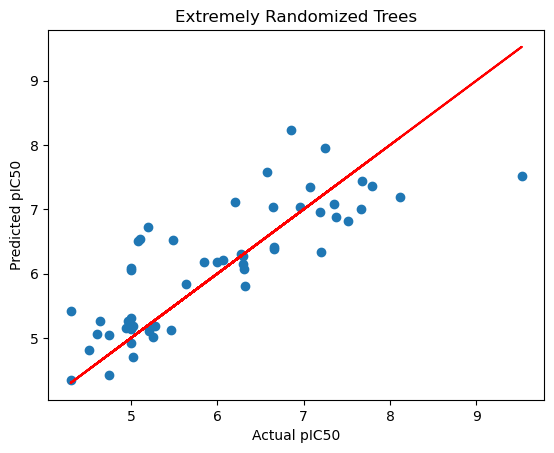

In [10]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
XRFreg = ExtraTreesRegressor(n_estimators=10,random_state=0)
XRFreg.fit(X_train,y_train)
XRF_cod=XRFreg.score(X_test,y_test)
mse=(metrics.mean_squared_error(XRFreg.predict(X_test),y_test))
print('Coefficient of determination(R^2) = {}'.format(XRF_cod)) 
print('Mean squared error = {}'.format(mse))
XRF_rmse=mse**0.5
print('Root Mean squared error = {}'.format(XRF_rmse))

plt.scatter(y_test,XRFreg.predict(X_test))
plt.plot(y_test,y_test,color='red')
plt.xlabel('Actual pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Extremely Randomized Trees')


In [11]:
df2 = pd.read_csv(r'rdkit_PubChem_phytochemicals.csv')
df2 = df2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df2.shape

def clean_dataset(df2):
    assert isinstance(df2, pd.DataFrame), "df needs to be a pd.DataFrame"
    df2.dropna(inplace=True)
    indices_to_keep = ~df2.isin([np.nan, np.inf, -np.inf]).any(1)
    return df2[indices_to_keep].astype(np.float64)
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.shape

(1143, 208)

In [12]:
df2 = df2.fillna(df.median()).clip(-1e11,1e11)
print(df2)

      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0          11.137569       -1.330249          11.137569           0.628212   
1           9.861111       -2.789931           9.861111           1.502315   
2           5.750000       -0.250000           5.750000           0.250000   
3          10.755972       -4.178819          10.755972           2.739931   
4          11.269861       -4.024306          11.269861           2.235301   
...              ...             ...                ...                ...   
1140       16.509548       -6.569682          16.509548           2.497554   
1141       14.337558       -5.291466          14.337558           1.839406   
1142       18.358776       -8.009142          18.358776           3.653495   
1143       16.182197       -7.912117          16.182197           1.934525   
1144       11.129162       -7.524960          11.129162           3.650274   

           qed     MolWt  HeavyAtomMolWt   ExactMolWt  NumValen

In [13]:
prediction=XRFreg.predict(df2)
print(prediction)

[4.82368234 4.80276945 4.86845315 ... 6.73822938 5.66561544 6.8449858 ]


C:\Users\91830\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


In [14]:
res = pd.DataFrame(prediction)
res.columns = ["prediction"]
res.to_csv("predictionreg_results.csv")

In [16]:
# retrieve performance metrics
results = XRFreg.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')

AttributeError: 'ExtraTreesRegressor' object has no attribute 'evals_result'

In [22]:
import matplotlib.pyplot as plt
#Explore the model - learning curve
#PT Step 0: learning curve to observe current model performance, without any PT
#define a function to draw learning curve: training sample quantity as x-axis
def plot_learning_curve(estimator, title, X, y
                        ,ax=None #choose plot
                        ,ylim=None #set y-axis range
                        ,cv=10 #cross validation
                        ,n_jobs=None #set processes
                        ):

    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                           ,shuffle=True
                                                           ,cv=cv
                                                           ,random_state=420
                                                           ,n_jobs=n_jobs)
if ax == None:
    ax = plt.gca()
else:
    
    ax = plt.figure()
ax.set_title(title)
if ylim is not None:
    ax.set_ylim(*ylim)
ax.set_xlabel('Training samples')
ax.set_ylabel("Score")
ax.grid() #draw grid, optional
ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
        , color='r', label='Training score')
ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
       , color='g', label='Test score')
ax.legend(loc='best')
return ax

NameError: name 'ax' is not defined